In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(1025, 14)

#### Age: The age of the patient (years).
#### Sex: The gender of the patient (1 = male, 0 = female).
#### Cp (Chest Pain Type): The type of chest pain experienced by the patient, which is categorized into:
#### 0: Typical angina
#### 1: Atypical angina
#### 2: Non-anginal pain
#### 3: Asymptomatic
#### Trestbps (Resting Blood Pressure): The patient’s resting blood pressure (measured in mm Hg) at the time of hospital admission.
#### Chol (Serum Cholesterol): The patient’s serum cholesterol in mg/dL.
#### Fbs (Fasting Blood Sugar): Fasting blood sugar levels, where 1 indicates fasting blood sugar > 120 mg/dL, and 0 indicates otherwise.
#### Restecg (Resting Electrocardiographic Results): Results of the resting electrocardiogram, which are categorized into:
#### 0: Normal
#### 1: Having ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression of > 0.05 mV)
#### 2: Showing probable or definite left ventricular hypertrophy by Estes’ criteria
#### Thalach (Maximum Heart Rate Achieved): The maximum heart rate achieved during the stress test.
#### Exang (Exercise Induced Angina): Whether the patient experiences angina during exercise (1 = yes, 0 = no).
#### Oldpeak: The ST depression induced by exercise relative to rest. It indicates the relative deviation in the ST segment on the ECG during exercise.
#### Slope: The slope of the peak exercise ST segment, which can be:
#### 0: Upsloping
#### 1: Flat
#### 2: Downsloping
#### Ca (Number of Major Vessels Colored by Fluoroscopy): The number of major vessels (0-3) colored by fluoroscopy. This indicates the number of main blood vessels that have significant narrowing.
#### Thal (Thalassemia): A blood disorder that is categorized into:
#### 1: Normal
#### 2: Fixed defect (no blood flow in some part of the heart)
#### 3: Reversible defect (a blood flow is observed but no significant blockage)
#### Target: The presence of heart disease in the patient. It is the label to predict, where 1 indicates the presence of heart disease and 0 indicates absence.

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe(())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

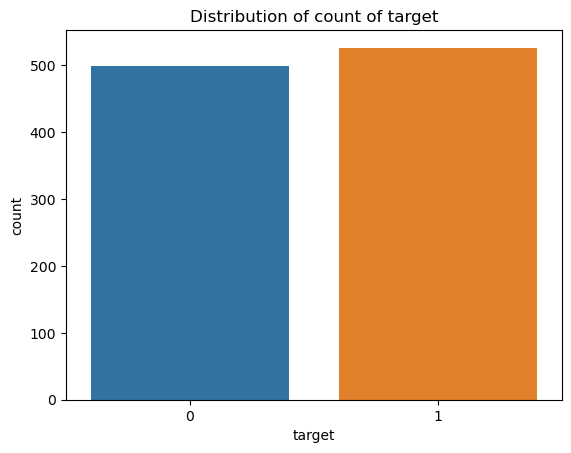

In [14]:
sns.countplot(x='target',data=df)
plt.title('Distribution of count of target')
plt.show()

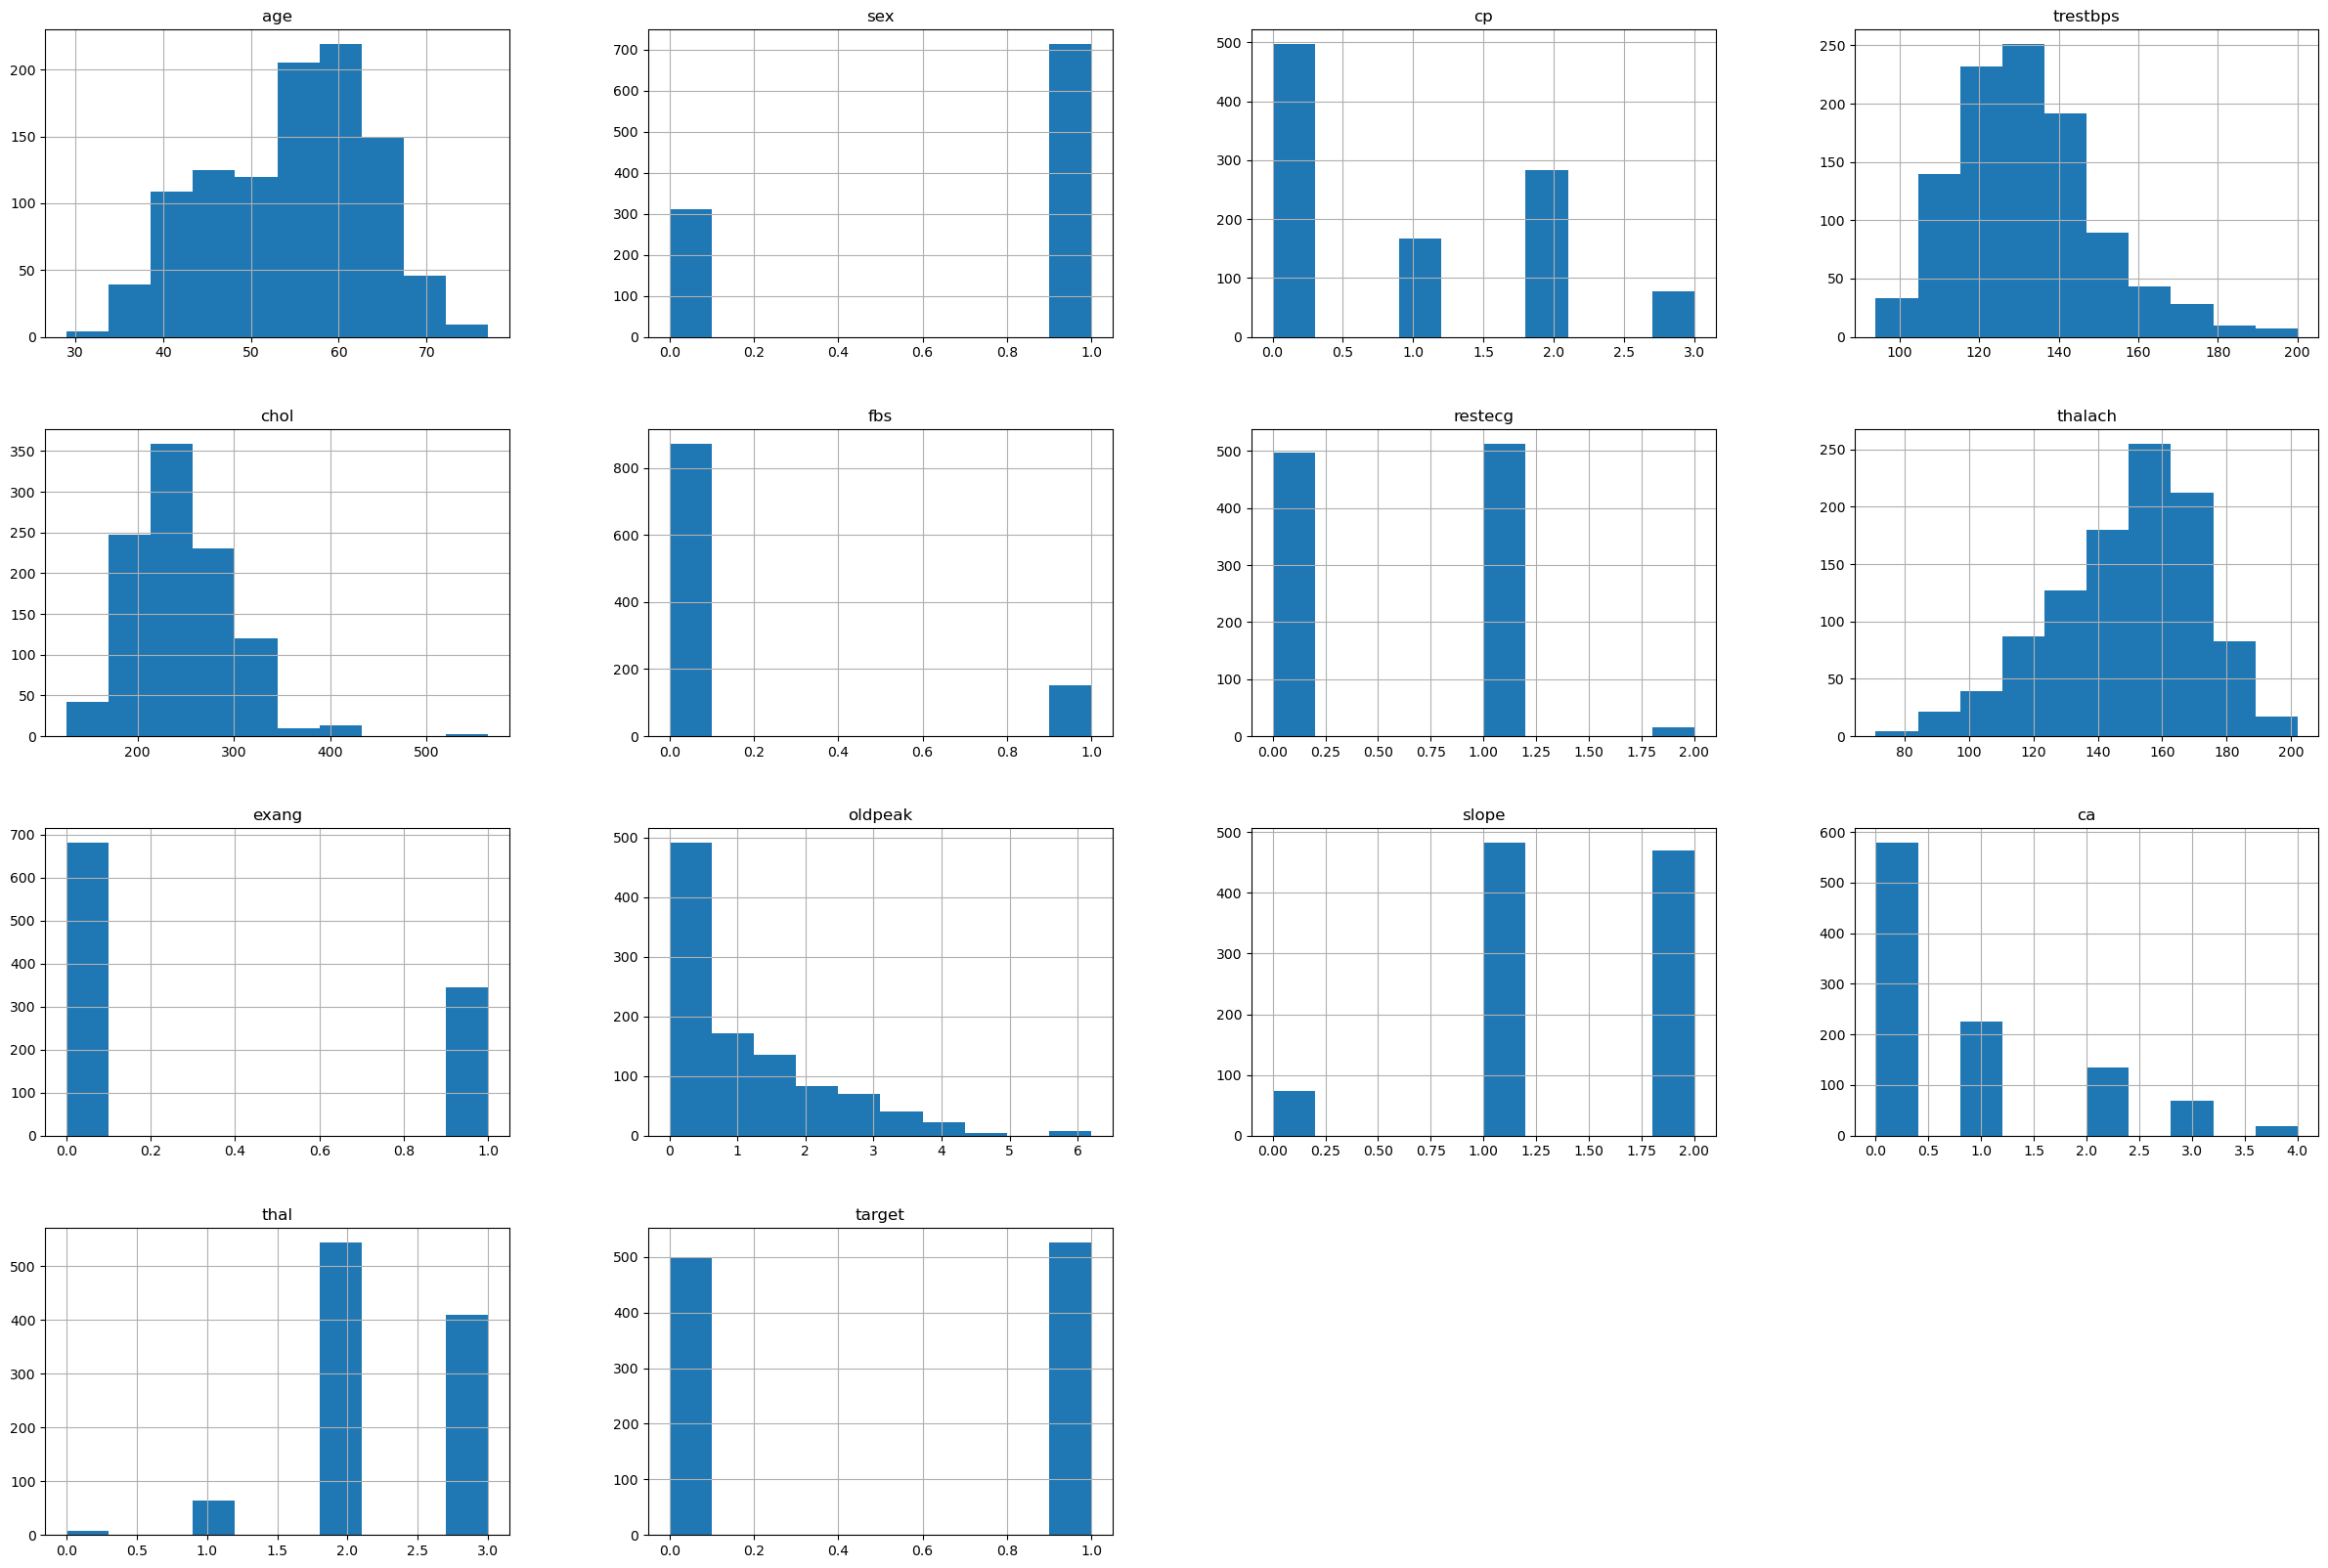

In [15]:
df.hist(figsize=(30,20))
plt.title('Histogram of features')
plt.show()

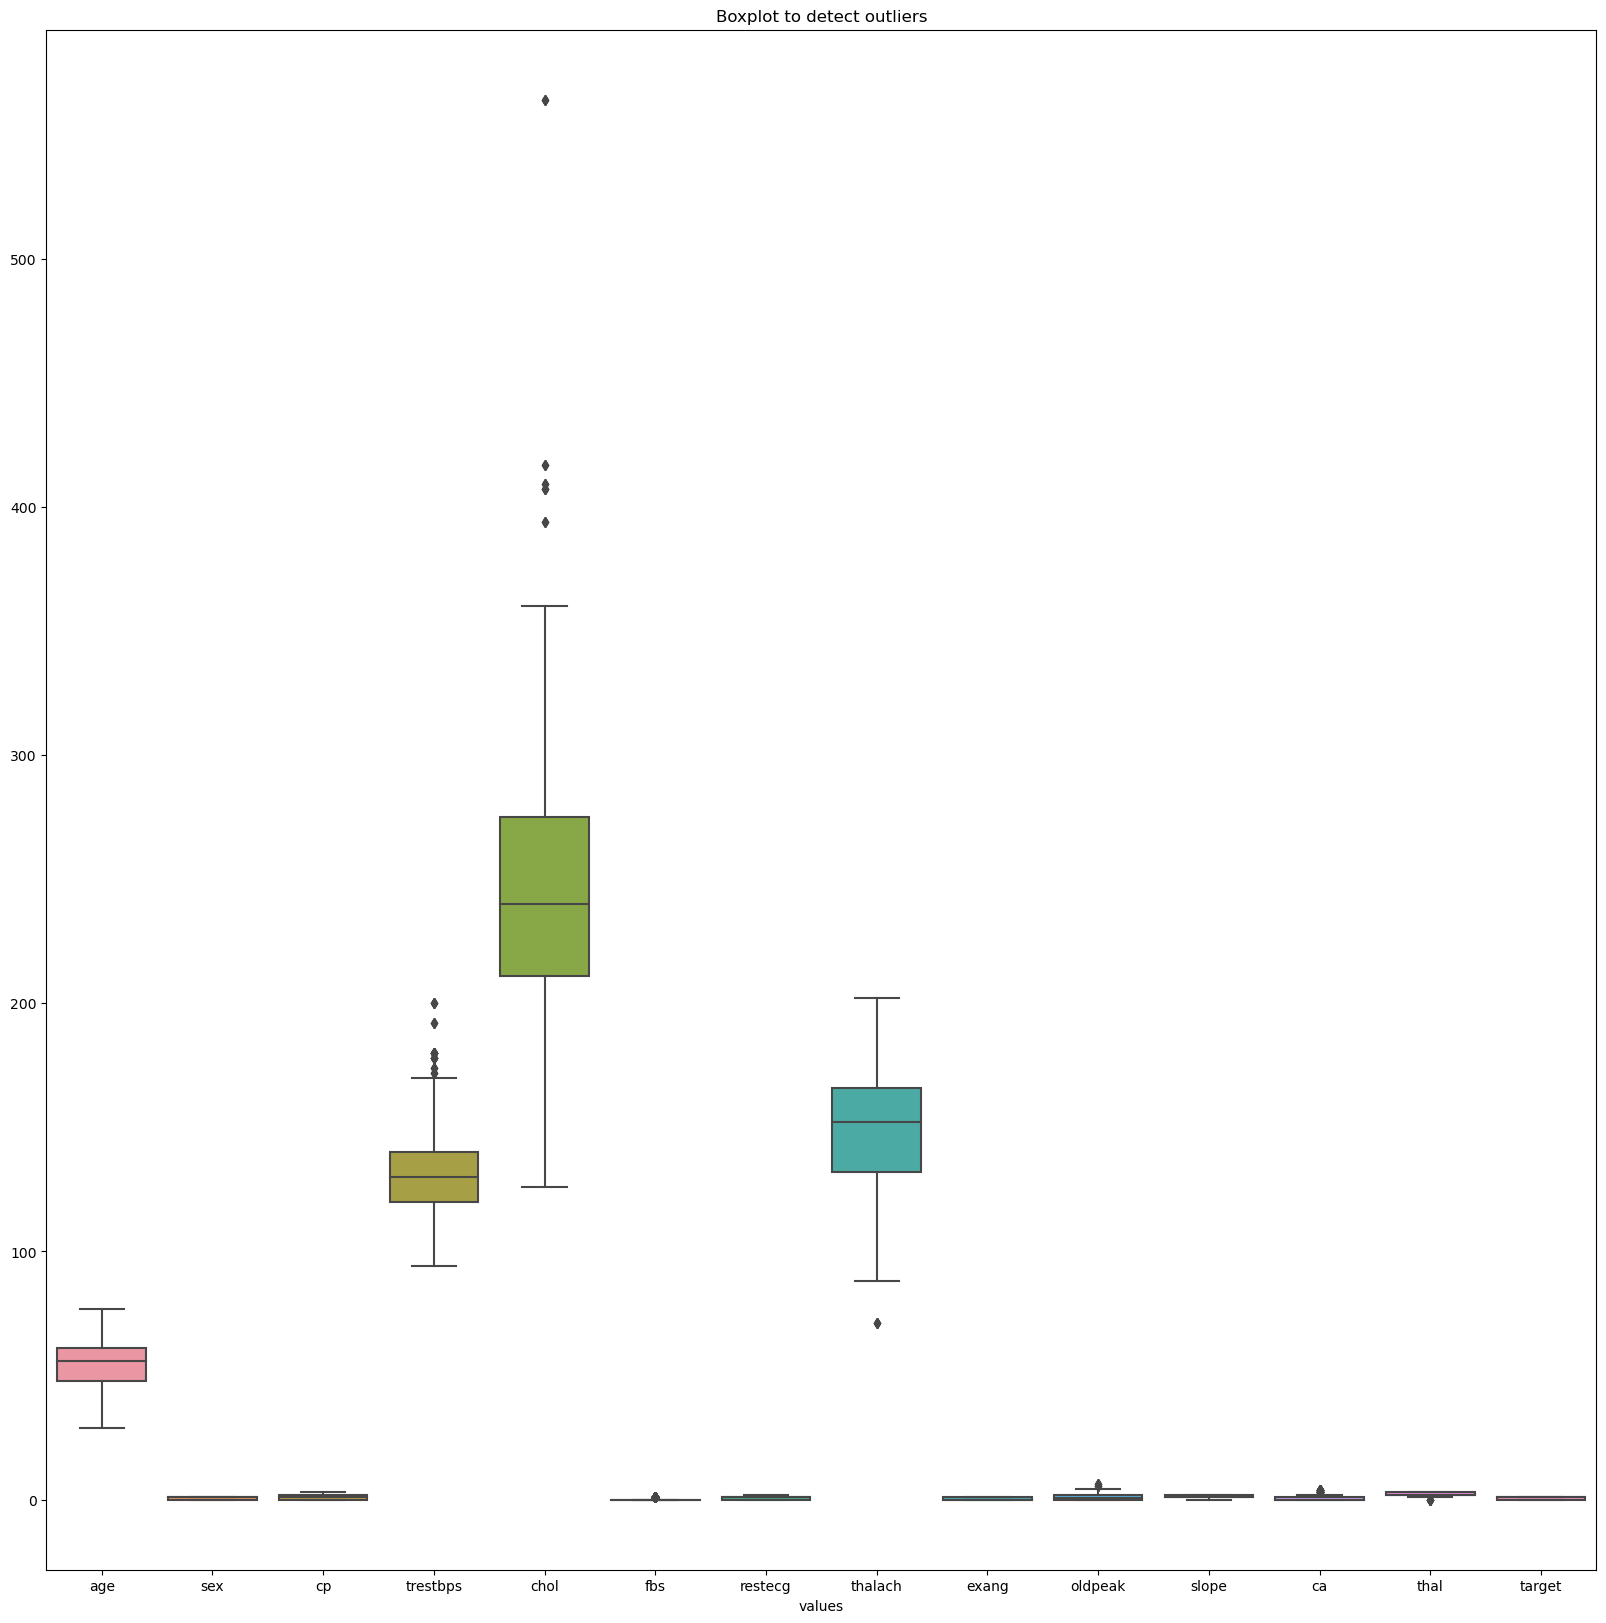

In [22]:
plt.figure(figsize=(20,20))
sns.boxplot(df)
plt.title("Boxplot to detect outliers")
plt.xlabel("values")
plt.show()

In [29]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

for column in df.columns:
    df[column] = remove_outliers(df[column])

df = df.dropna()

In [30]:
df.shape

(769, 14)

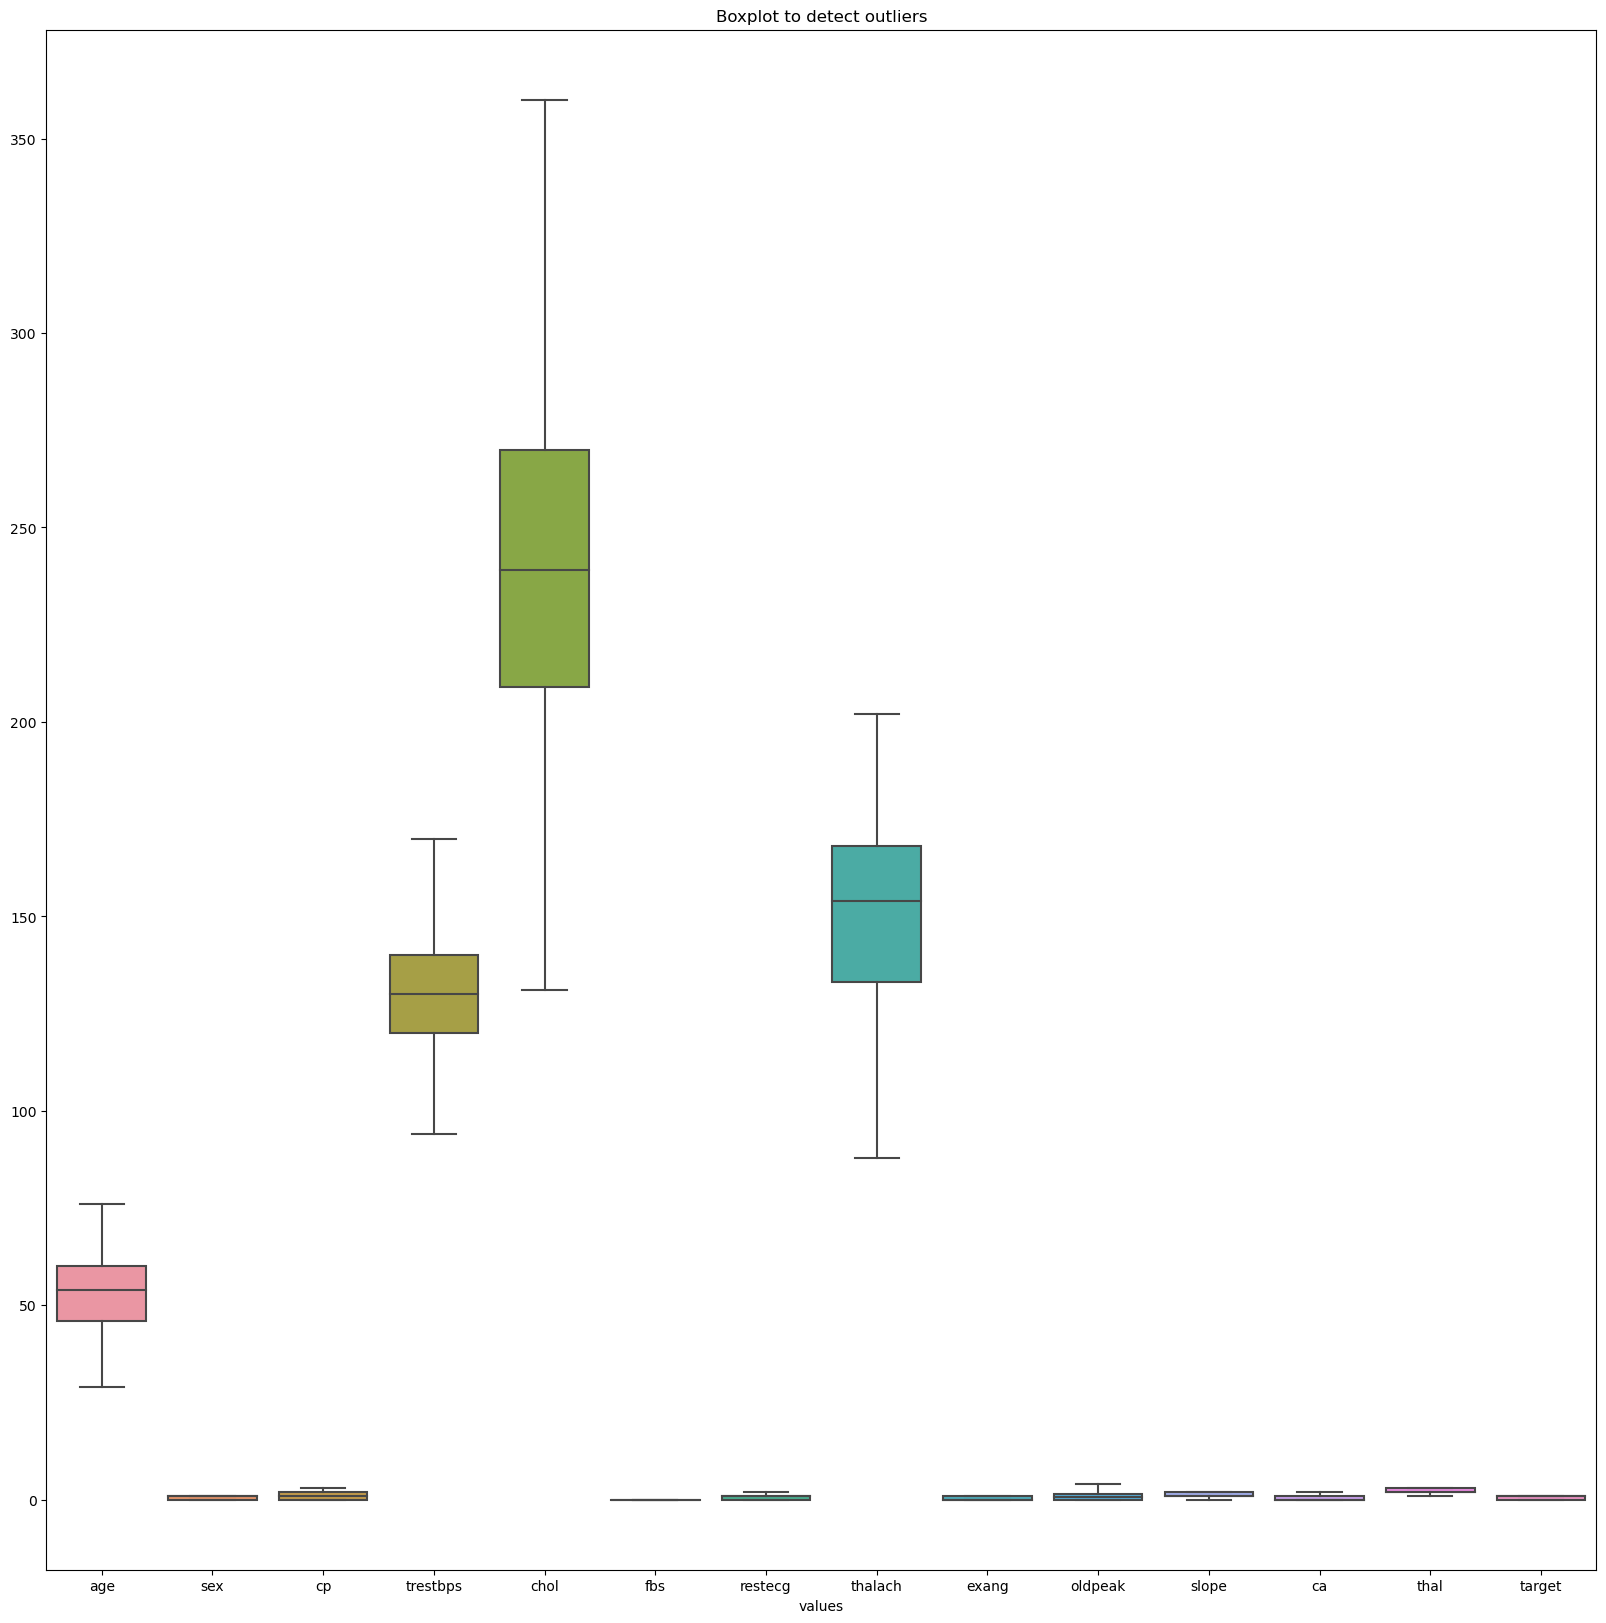

In [33]:
plt.figure(figsize=(20,20))
sns.boxplot(df)
plt.title("Boxplot to detect outliers")
plt.xlabel("values")
plt.show()

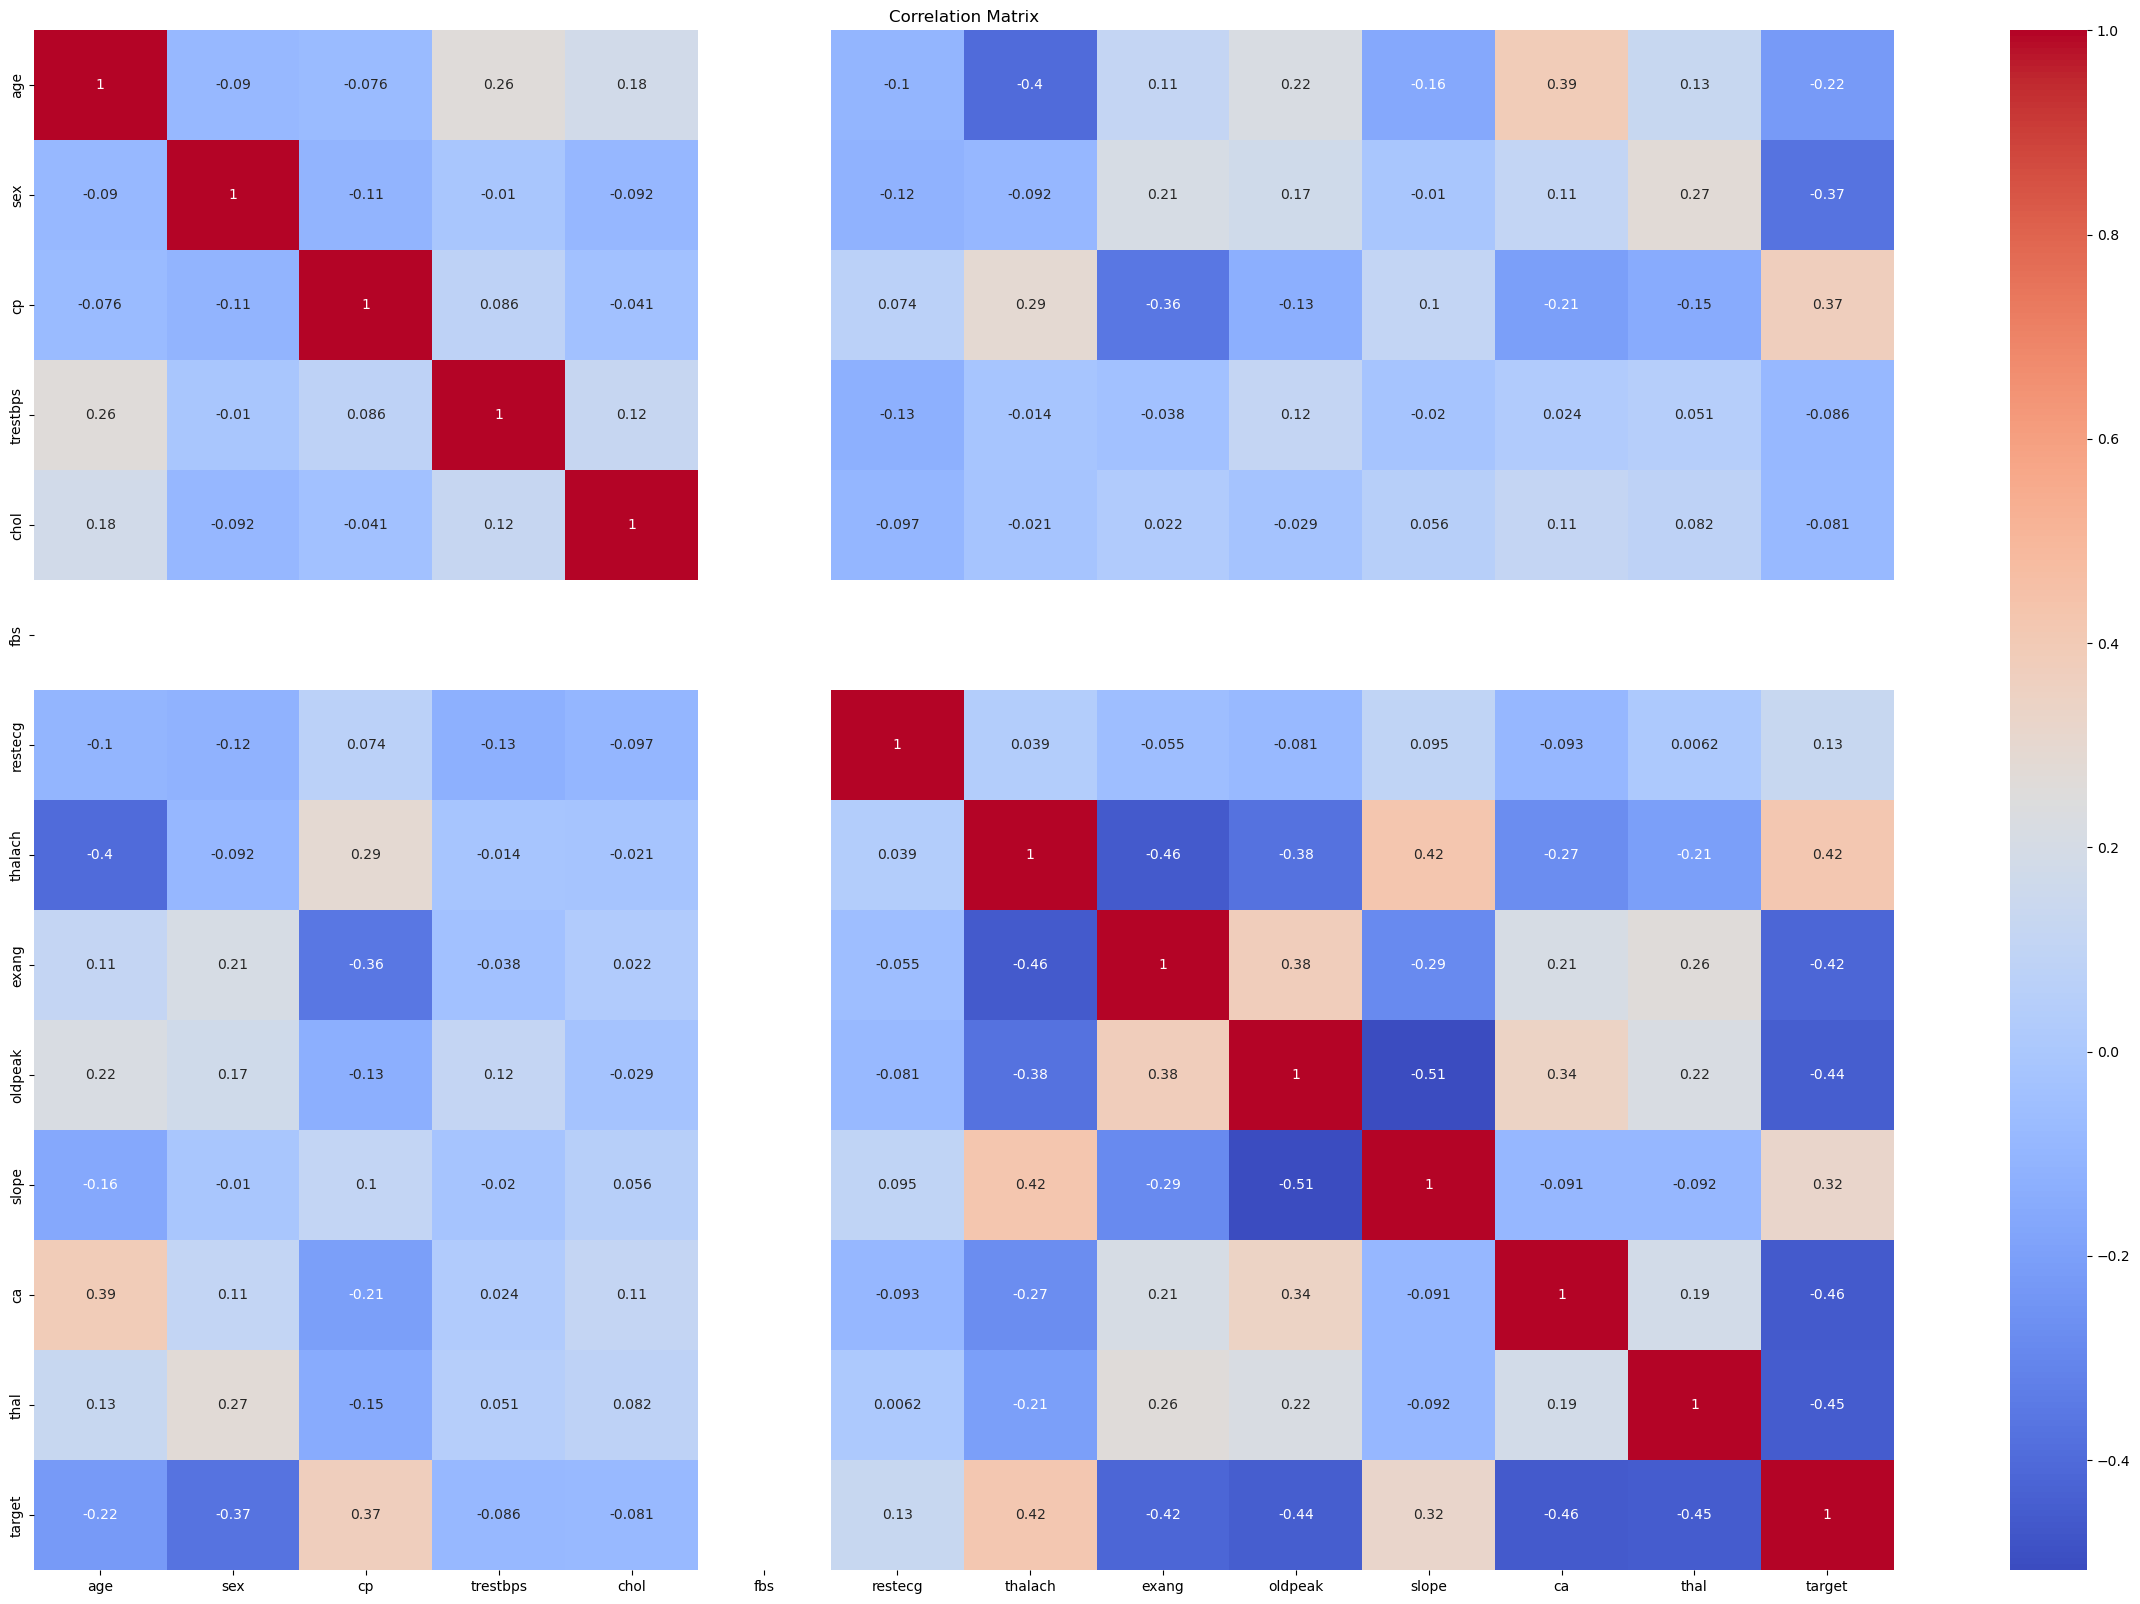

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

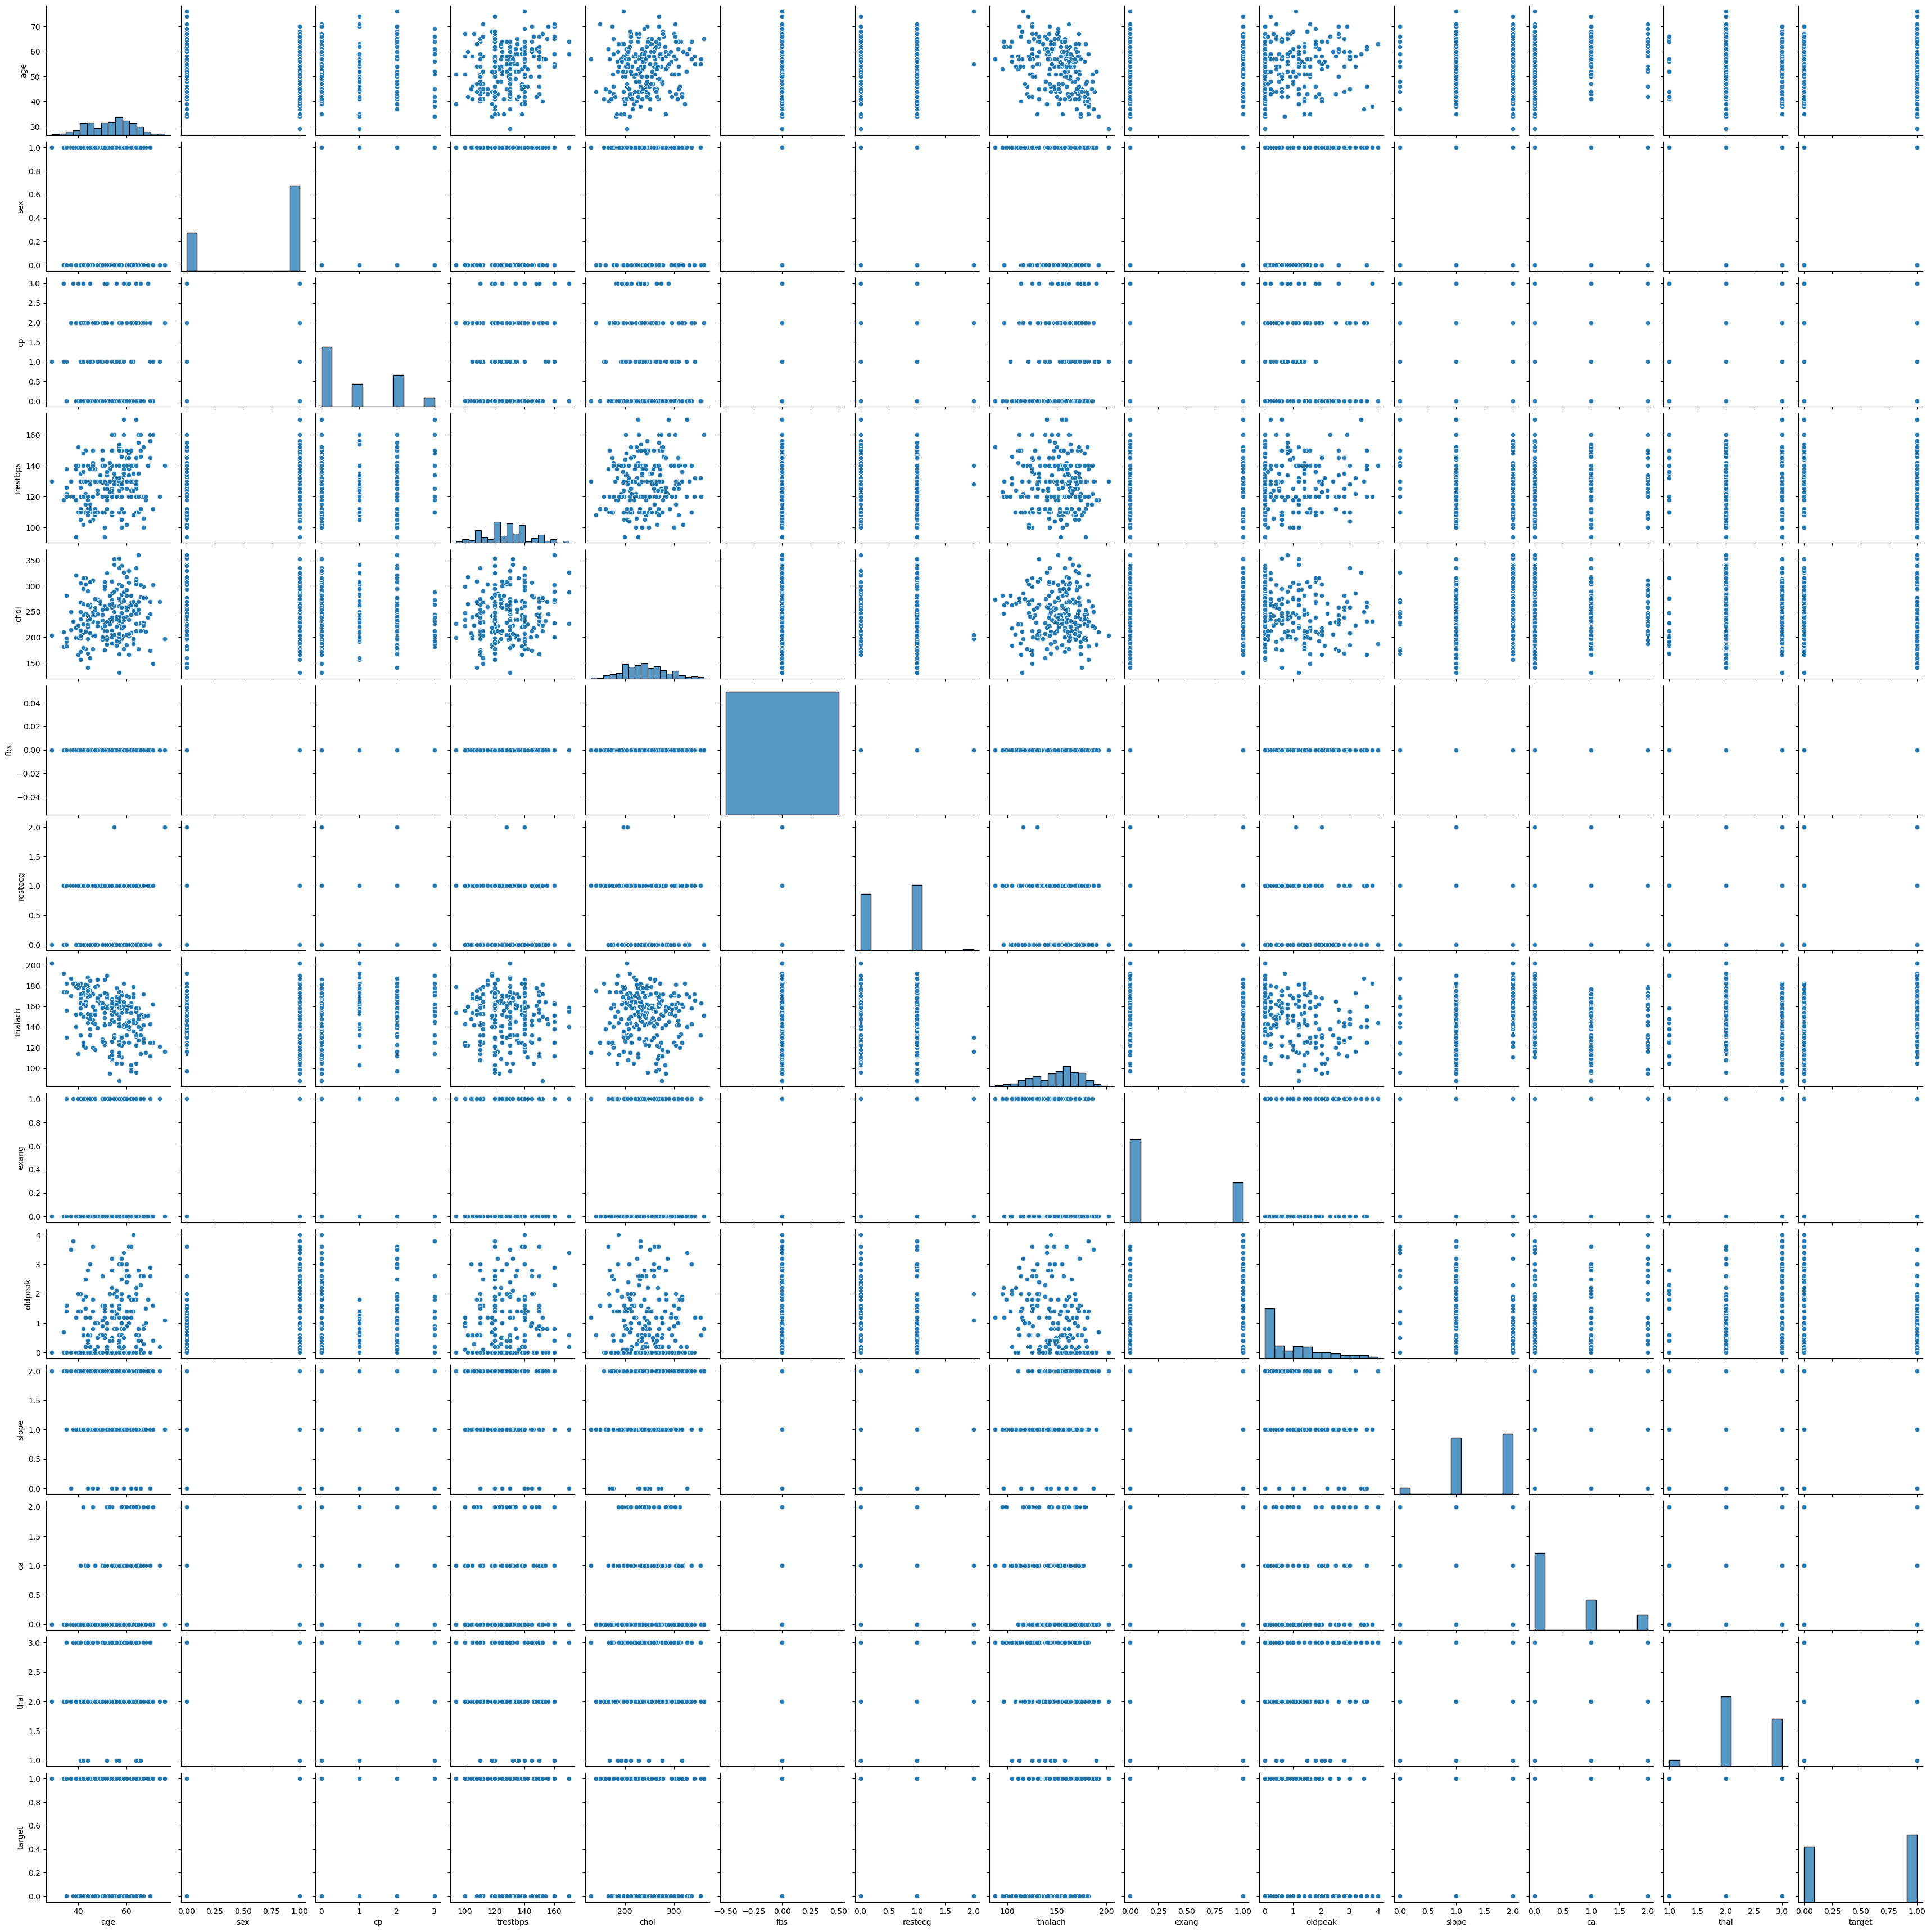

In [35]:
sns.pairplot(df)